In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/dataset_student_depression_cleaned')

In [3]:
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Study Hours,Financial Stress,Depression,Age Category
0,Male,33.0,Yes,No,6,Healthy,B.Pharm,3.0,No,1,30+
1,Female,24.0,No,Yes,6,Moderate,BSc,3.0,No,0,19-25
2,Male,31.0,No,Yes,5,Healthy,BA,9.0,No,0,30+
3,Female,28.0,No,No,7,Moderate,BCA,4.0,Yes,1,26-30
4,Female,25.0,Yes,No,6,Moderate,M.Tech,1.0,No,0,19-25
...,...,...,...,...,...,...,...,...,...,...,...
27878,Female,27.0,Yes,Yes,6,Unhealthy,'Class 12',7.0,No,0,26-30
27879,Male,27.0,No,No,5,Healthy,MSc,0.0,No,0,26-30
27880,Male,31.0,No,Yes,6,Unhealthy,MD,12.0,No,0,30+
27881,Female,18.0,Yes,No,5,Healthy,'Class 12',10.0,Yes,1,0-18


In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('Depression', axis=1)
y_label = data_label_encoded['Depression']

[array(['Female', 'Male'], dtype=object)]
[array(['No', 'Yes'], dtype=object)]
[array(['No', 'Yes'], dtype=object)]
[array(['5', '6', '7', '8+'], dtype=object)]
[array(['Healthy', 'Moderate', 'Others', 'Unhealthy'], dtype=object)]
[array(["'Class 12'", 'B.Arch', 'B.Com', 'B.Ed', 'B.Pharm', 'B.Tech', 'BA',
       'BBA', 'BCA', 'BE', 'BHM', 'BSc', 'LLB', 'LLM', 'M.Com', 'M.Ed',
       'M.Pharm', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA', 'MD', 'ME', 'MHM',
       'MSc', 'Others', 'PhD'], dtype=object)]
[array(['No', 'Yes'], dtype=object)]
[array(['0-18', '19-25', '26-30', '30+'], dtype=object)]


In [5]:
X_label

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Study Hours,Financial Stress,Age Category
0,1.0,33.0,1.0,0.0,1.0,0.0,4.0,3.0,0.0,3.0
1,0.0,24.0,0.0,1.0,1.0,1.0,11.0,3.0,0.0,1.0
2,1.0,31.0,0.0,1.0,0.0,0.0,6.0,9.0,0.0,3.0
3,0.0,28.0,0.0,0.0,2.0,1.0,8.0,4.0,1.0,2.0
4,0.0,25.0,1.0,0.0,1.0,1.0,17.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
27878,0.0,27.0,1.0,1.0,1.0,3.0,0.0,7.0,0.0,2.0
27879,1.0,27.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,2.0
27880,1.0,31.0,0.0,1.0,1.0,3.0,22.0,12.0,0.0,3.0
27881,0.0,18.0,1.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0


<Axes: >

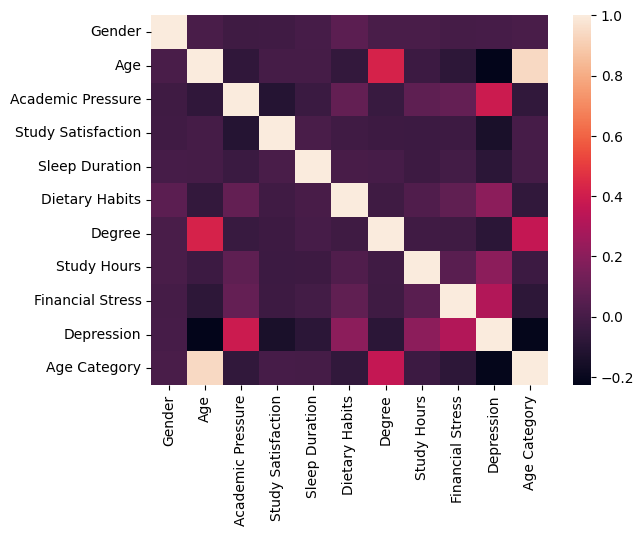

In [6]:
sns.heatmap(data_label_encoded.corr())

In [7]:
fi_df1 = data_label_encoded.corr()['Depression'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','Depression':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,Age,-0.226386
1,Academic Pressure,0.390555
2,Study Satisfaction,-0.143391
3,Sleep Duration,-0.087085
4,Dietary Habits,0.206793
5,Degree,-0.086866
6,Study Hours,0.208611
7,Financial Stress,0.312070
8,Depression,1.000000
9,Age Category,-0.214715


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,Degree,0.197402
1,Age,0.158283
2,Academic Pressure,0.157176
7,Study Hours,0.156316
4,Sleep Duration,0.092021
8,Financial Stress,0.086480
5,Dietary Habits,0.052435
0,Gender,0.049305
3,Study Satisfaction,0.032694
9,Age Category,0.017888


In [9]:
 from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
2,Academic Pressure,0.432319
8,Financial Stress,0.233192
1,Age,0.115357
7,Study Hours,0.087258
5,Dietary Habits,0.073379
3,Study Satisfaction,0.029505
4,Sleep Duration,0.020995
6,Degree,0.006492
9,Age Category,0.001248
0,Gender,0.000254


In [10]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
2,Academic Pressure,0.207073
8,Financial Stress,0.120927
7,Study Hours,0.059183
5,Dietary Habits,0.050547
1,Age,0.040160
4,Sleep Duration,0.011998
3,Study Satisfaction,0.011702
6,Degree,0.000999
0,Gender,0.000867
9,Age Category,-0.005817


In [11]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
2,Academic Pressure,0.151102
8,Financial Stress,0.113341
7,Study Hours,0.068403
5,Dietary Habits,0.062356
6,Degree,-0.000000
0,Gender,0.000000
9,Age Category,-0.001130
4,Sleep Duration,-0.024680
3,Study Satisfaction,-0.038445
1,Age,-0.074692


In [12]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,Degree,0.198687
1,Age,0.158624
7,Study Hours,0.157001
2,Academic Pressure,0.156672
4,Sleep Duration,0.092295
8,Financial Stress,0.085781
5,Dietary Habits,0.051665
0,Gender,0.049448
3,Study Satisfaction,0.032183
9,Age Category,0.017645


In [13]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
2,Academic Pressure,0.157371
8,Financial Stress,0.120587
7,Study Hours,0.076468
5,Dietary Habits,0.070353
6,Degree,0.004820
0,Gender,-0.000380
9,Age Category,-0.004504
4,Sleep Duration,-0.034170
3,Study Satisfaction,-0.046998
1,Age,-0.081833


In [14]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [15]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
Age,-0.226386,0.158283,0.115357,0.040160,-0.074692,0.158624,-0.081833
Academic Pressure,0.390555,0.157176,0.432319,0.207073,0.151102,0.156672,0.157371
Study Satisfaction,-0.143391,0.032694,0.029505,0.011702,-0.038445,0.032183,-0.046998
Sleep Duration,-0.087085,0.092021,0.020995,0.011998,-0.024680,0.092295,-0.034170
Dietary Habits,0.206793,0.052435,0.073379,0.050547,0.062356,0.051665,0.070353
Degree,-0.086866,0.197402,0.006492,0.000999,-0.000000,0.198687,0.004820
Study Hours,0.208611,0.156316,0.087258,0.059183,0.068403,0.157001,0.076468
Financial Stress,0.312070,0.086480,0.233192,0.120927,0.113341,0.085781,0.120587
Age Category,-0.214715,0.017888,0.001248,-0.005817,-0.001130,0.017645,-0.004504


In [16]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [17]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score',]].mean(axis=1).sort_values(ascending=False)

,0
feature,
Academic Pressure,0.294854
Financial Stress,0.164471
Study Hours,0.134002
Age,0.132399
Degree,0.106292
Dietary Habits,0.071164
Sleep Duration,0.059761
Study Satisfaction,0.030329
Age Category,0.006729


In [19]:
X_label

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Study Hours,Financial Stress,Age Category
0,1.0,33.0,1.0,0.0,1.0,0.0,4.0,3.0,0.0,3.0
1,0.0,24.0,0.0,1.0,1.0,1.0,11.0,3.0,0.0,1.0
2,1.0,31.0,0.0,1.0,0.0,0.0,6.0,9.0,0.0,3.0
3,0.0,28.0,0.0,0.0,2.0,1.0,8.0,4.0,1.0,2.0
4,0.0,25.0,1.0,0.0,1.0,1.0,17.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
27878,0.0,27.0,1.0,1.0,1.0,3.0,0.0,7.0,0.0,2.0
27879,1.0,27.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,2.0
27880,1.0,31.0,0.0,1.0,1.0,3.0,22.0,12.0,0.0,3.0
27881,0.0,18.0,1.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0


In [21]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [22]:
scores.mean()

np.float64(0.23409407857013118)